In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
df1 =  pd.read_csv(r"C:\Users\Edwin\Documents\Malvern Instruments\Zetasizer\Export Data\10_06_20.txt")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 4299: invalid start byte

In [103]:
# forced to open with csv as non-utf-8 does not allow to open with pd.readcsv, its a blank space.
data_file_path = r"C:\Users\Edwin\Desktop\101020\10_06_20_Turbid_Scan"
with open(data_file_path, mode='r') as file: 
    reader = csv.reader(file, delimiter=',')
    data = [row for row in reader] 

df = pd.DataFrame(data, columns = data[0]) 
df = df.drop([0])
df = df.drop(df.index[[3,4,5]])
# unable to move header to column because of issue with different amount of data points for certain parameters
# so make itthat either each has own header or just look at things that have singular or set value

In [127]:
def slice_df(df, n):
    new_df_con = [] 
    for i, (key, row) in enumerate(df.iterrows()):
        series = row
        if i % n == 0:
            new_df_con.append(series)
    new_df = pd.concat(new_df_con, axis = 1)
    return new_df.T

In [128]:
df_new = slice_df(df, 3)
df_new

,Sample Name,Serial Number,Z-Average (d.nm),PdI,Derived Count Rate (kcps),Intensity Mean (d.nm),Attenuator,Measurement Position (mm),Duration (s),Viscosity (cP),Diffusion Coefficient (µ²/s)
1,S1_Ouzo_Sat_5pct 1,MAL1046558,230.5,0.135,22620.1,251.6,7,4.65,60,2.0780,0.898
7,S2_Ouzo_Sat_10pct 1,MAL1046558,229.5,0.057,31862.9,250.0,7,4.65,60,2.0780,0.902
10,S3_Ouzo_Sat_15pct 1,MAL1046558,281.3,0.115,21792.1,315.2,7,4.65,60,2.0780,0.736
13,S4_Ouzo_Sat_20pct 1,MAL1046558,380.7,0.081,13294.0,403.4,7,4.65,60,2.0780,0.544
16,S5_Ouzo_Sat_25pct 1,MAL1046558,374.9,0.210,15117.7,492.2,7,4.65,60,2.0780,0.552
19,S1_Ouzo_NS 1,MAL1046558,180.4,0.265,3431.5,386.4,7,4.65,60,2.0780,1.15
22,S2_Ouzo_NS 1,MAL1046558,197.2,0.104,21013.2,221.9,7,4.65,60,2.0780,1.05
25,S3_Ouzo_NS 1,MAL1046558,188.1,0.091,37384.1,208.7,7,4.65,60,2.0780,1.10
28,S4_Ouzo_NS 1,MAL1046558,188.2,0.105,52220.5,208.4,7,4.65,60,2.0780,1.10


Text(0, 0.5, 'PdI')

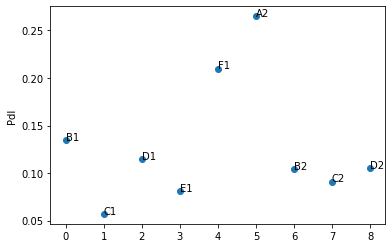

In [139]:
x_scatter = []
y_scatter = [] 
y_string ='PdI'
wells = ['B1', 'C1', 'D1', 'E1', 'F1', 'A2', 'B2', 'C2', 'D2']

for i, (key, row) in enumerate(df_new.iterrows()): # next time place well in actual sample name like the unique ID 
    y = row[y_string]
    x_scatter.append(i)
    y_scatter.append(float(y))

fig, ax = plt.subplots()
ax.scatter(x_scatter, y_scatter)

for i, well in enumerate(wells):
    ax.annotate(well, (x_scatter[i], y_scatter[i]))
    
plt.ylabel(y_string)

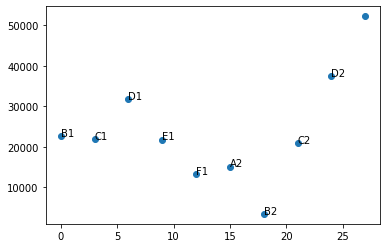

In [98]:
# fig, ax = plt.subplots()
x_list = []
y_list = []
legends = []
wells = ['B1', 'C1', 'D1', 'E1', 'F1', 'A2', 'B2', 'C2', 'D2']
for i, (key, row) in enumerate(df.iterrows()): # next time place well in actual sample name like the unique ID 
    name = row['Sample Name']
    intensity = row['Intensity Mean (d.nm)']
    count_rate = row['Derived Count Rate (kcps)']
    x = i
    y = float(count_rate)
    
    x_list.append(x)
    y_list.append(y)
    legends.append(name)
#     ax.plot(x,y, label = name)
new_x_list = x_list[0::3]
new_y_list = y_list[0::3]

fig, ax = plt.subplots()
ax.scatter(new_x_list, new_y_list)
new_legends = legends[0::3]

for i, well in enumerate(wells):
    ax.annotate(well, (new_x_list[i], new_y_list[i]))
    
# ax.annotate('hello', xy=(1.05, 0.85), xycoords='axes fraction')   
# #ax.legend()
# ax.set_xlabel('Sample')
# plt.show()

In [ ]:
# average 3 samples or just the components, lol im done